In [14]:
import matplotlib.pyplot as plt
import numpy as np


def make_bar_chart(frozen, name):
    datasets = ("BACE", "BBBP", "HIV")
    x = np.arange(len(datasets))
    width = 0.2
    multiplier = 0

    fig, ax = plt.subplots(layout="constrained")

    for model, dataset in frozen.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, dataset, width, label=model)
        ax.bar_label(rects, padding=2)
        multiplier += 1

    ax.set_ylabel("ROC_AUC")
    ax.set_title(name)
    ax.set_xticks(x + width, datasets)
    ax.legend(loc="upper right")
    ax.set_ylim(0, 1.1)

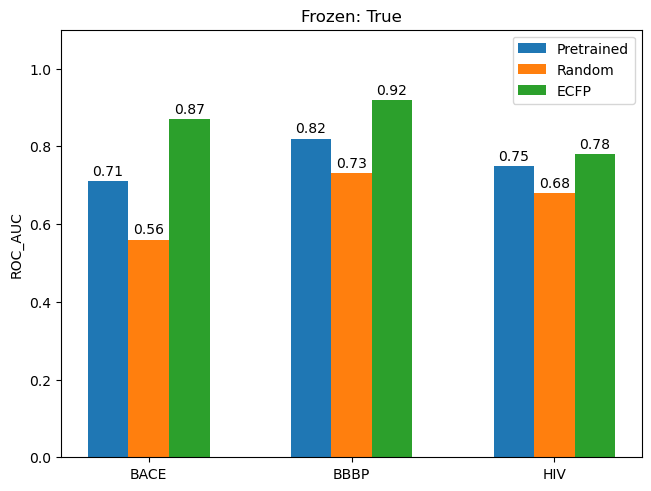

In [15]:
frozen_true = {
    "Pretrained": (0.71, 0.82, 0.75),
    "Random": (0.56, 0.73, 0.68),
    "ECFP": (0.87, 0.92, 0.78)
}

make_bar_chart(frozen_true, "Frozen: True")

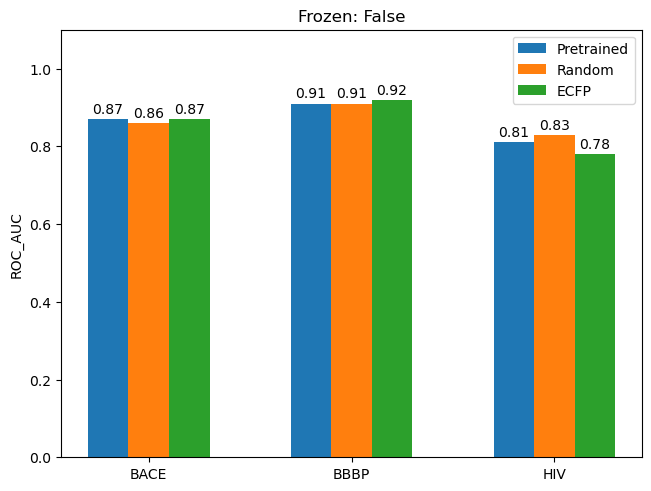

In [16]:
frozen_false = {
    "Pretrained": (0.87, 0.91, 0.81),
    "Random": (0.86, 0.91, 0.83),
    "ECFP": (0.87, 0.92, 0.78)
}

make_bar_chart(frozen_false, "Frozen: False")